In [43]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [10]:
#Import data
data = pd.read_csv("data.csv")

#Select prediction target
y = data.HeartDiseaseorAttack
X = data.drop('HeartDiseaseorAttack', axis = 1)

In [41]:
y.value_counts()
#Therefore almost 90% of the data is 0s and 10% is ones
#so even if we predict all values to be 0 then we get accuracy > 90%

0    229787
1     23893
Name: HeartDiseaseorAttack, dtype: int64

ROC-AUC Score: 0.5


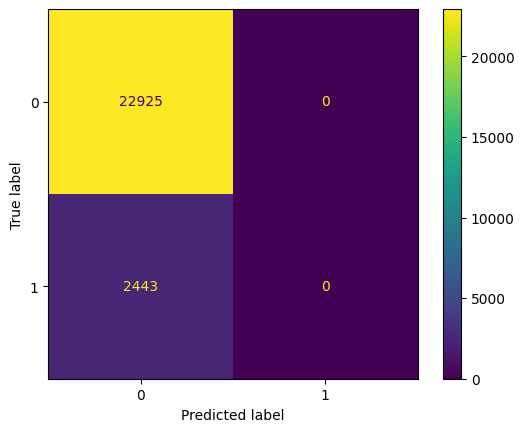

In [49]:
allzeros = np.zeros(len(test_y))
score = roc_auc_score(test_y, allzeros)
print(f"ROC-AUC Score: {score}")
ConfusionMatrixDisplay.from_predictions(test_y, allzeros)

In [11]:
#Train test split
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size = 0.1, random_state = 1)

In [36]:
def train_and_evaluate(model):
    model.fit(train_X, train_y)
    preds = model.predict_proba(test_X)[:, 1]#predicting probability instead of 0 and 1
    score = roc_auc_score(test_y, preds)
    print(f"ROC-AUC Score: {score}")
    ConfusionMatrixDisplay.from_estimator(model, test_X, test_y, display_labels = model.classes_)

ROC-AUC Score: 0.8241953441408498


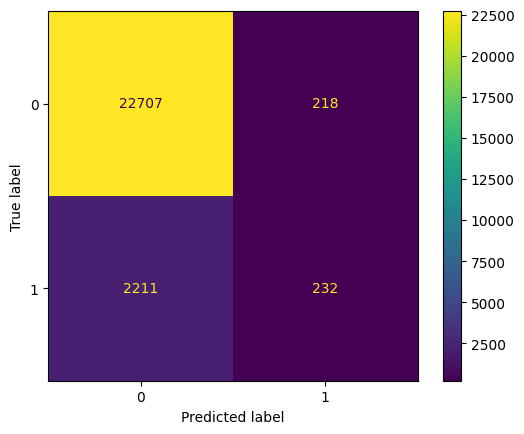

In [37]:
dt = DecisionTreeClassifier(max_leaf_nodes = 480,random_state=1)
train_and_evaluate(dt)

ROC-AUC Score: 0.7830150819268192


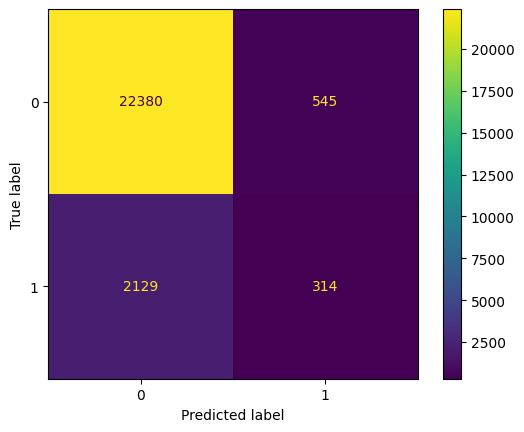

In [38]:
rf = RandomForestClassifier(random_state=1)
train_and_evaluate(rf)

ROC-AUC Score: 0.8377681230194565


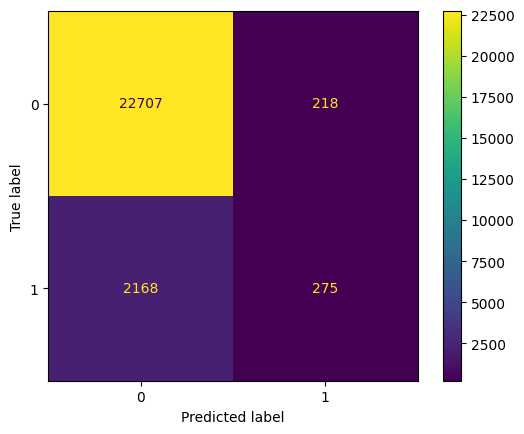

In [39]:
logistic = LogisticRegression(max_iter = 1000)
train_and_evaluate(logistic)